# Aviation Data Analysis

## 1. Business Problem

A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. We are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. We must then translate our findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### 1.1. Objectives

The main objective we set out to achieve is to determine:
>  which aircraft has the lowest risk and most suitable for a new business venture. 

We will set out to do this by answering the following main objectives:

- Identifying and characterising aircraft safety risks
- Understanding the factors contributing to aircraft incidents

This will then be broken down in the following way:

#### 1.1.1. Aircraft characteristics and patterns
- Identify the most common aircraft makes and models
- Pinpoint aircraft with the lowest incident rates
- Analyze safety correlations with:
    - Aircraft type
    - Number of engines
    - Engine types

#### 1.1.2. Environmentals factors and patterns
- Investigate the relationship between weather conditions and aircraft safety
- Assess whether aircraft safety has improved or declined over time 

#### 1.1.3 Accident and Injury Analysis
- Analyse the distribution of accidents across different aircraft carriers
- Compare injury severities:
    - Fatal injuries
    - Serious injuries
    - Minor injuries
- Investigate variations in injury patterns among different carriers
- What's the relationship between aircraft damage level vs injury severity

### Expected Outcome

We expect to gain a comprehensive risk profile for different aircraft carriers and which particular aircraft is the best for a new business venture.




# 2. Data Understanding

The [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) we've been provided is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This section will include:
- Data Description
- Data Exploration
- Data Quality

## 2.1. Data Description

The data dictionary of the dataset is as follows:

| Column name | Description |
| ----- | ----- |


*load libraries*

In [34]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Settings
pd.set_option('display.max_rows', 100)
sns.set(style='whitegrid')

# Configure visualisations
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/user/Documents/personal-projects/Moringa/aircraft_safety/data/Aviation_Data.csv")
print(df.shape)
df.head()

/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_42798/3516710800.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/user/Documents/personal-projects/Moringa/aircraft_safety/data/Aviation_Data.csv")


(90348, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


We can see a high level overview of our data and that we have 90,348 rows and 31 columns

**Summary of data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From this we can see nearly all columns have missing data except the 'Investigation.Type'
We can also see the formats of the data are as we expect with most being text and a few numerical columns

In [5]:
# Numerical summary stats
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the general summary statistics  of the numerical columns we can see the min, max of columns amongst other statistics and from the overview above, the data looks okay with no obvious outliers, but this will be further investigated.

## 2.2. Data Exploration

In [6]:
# Checking for missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

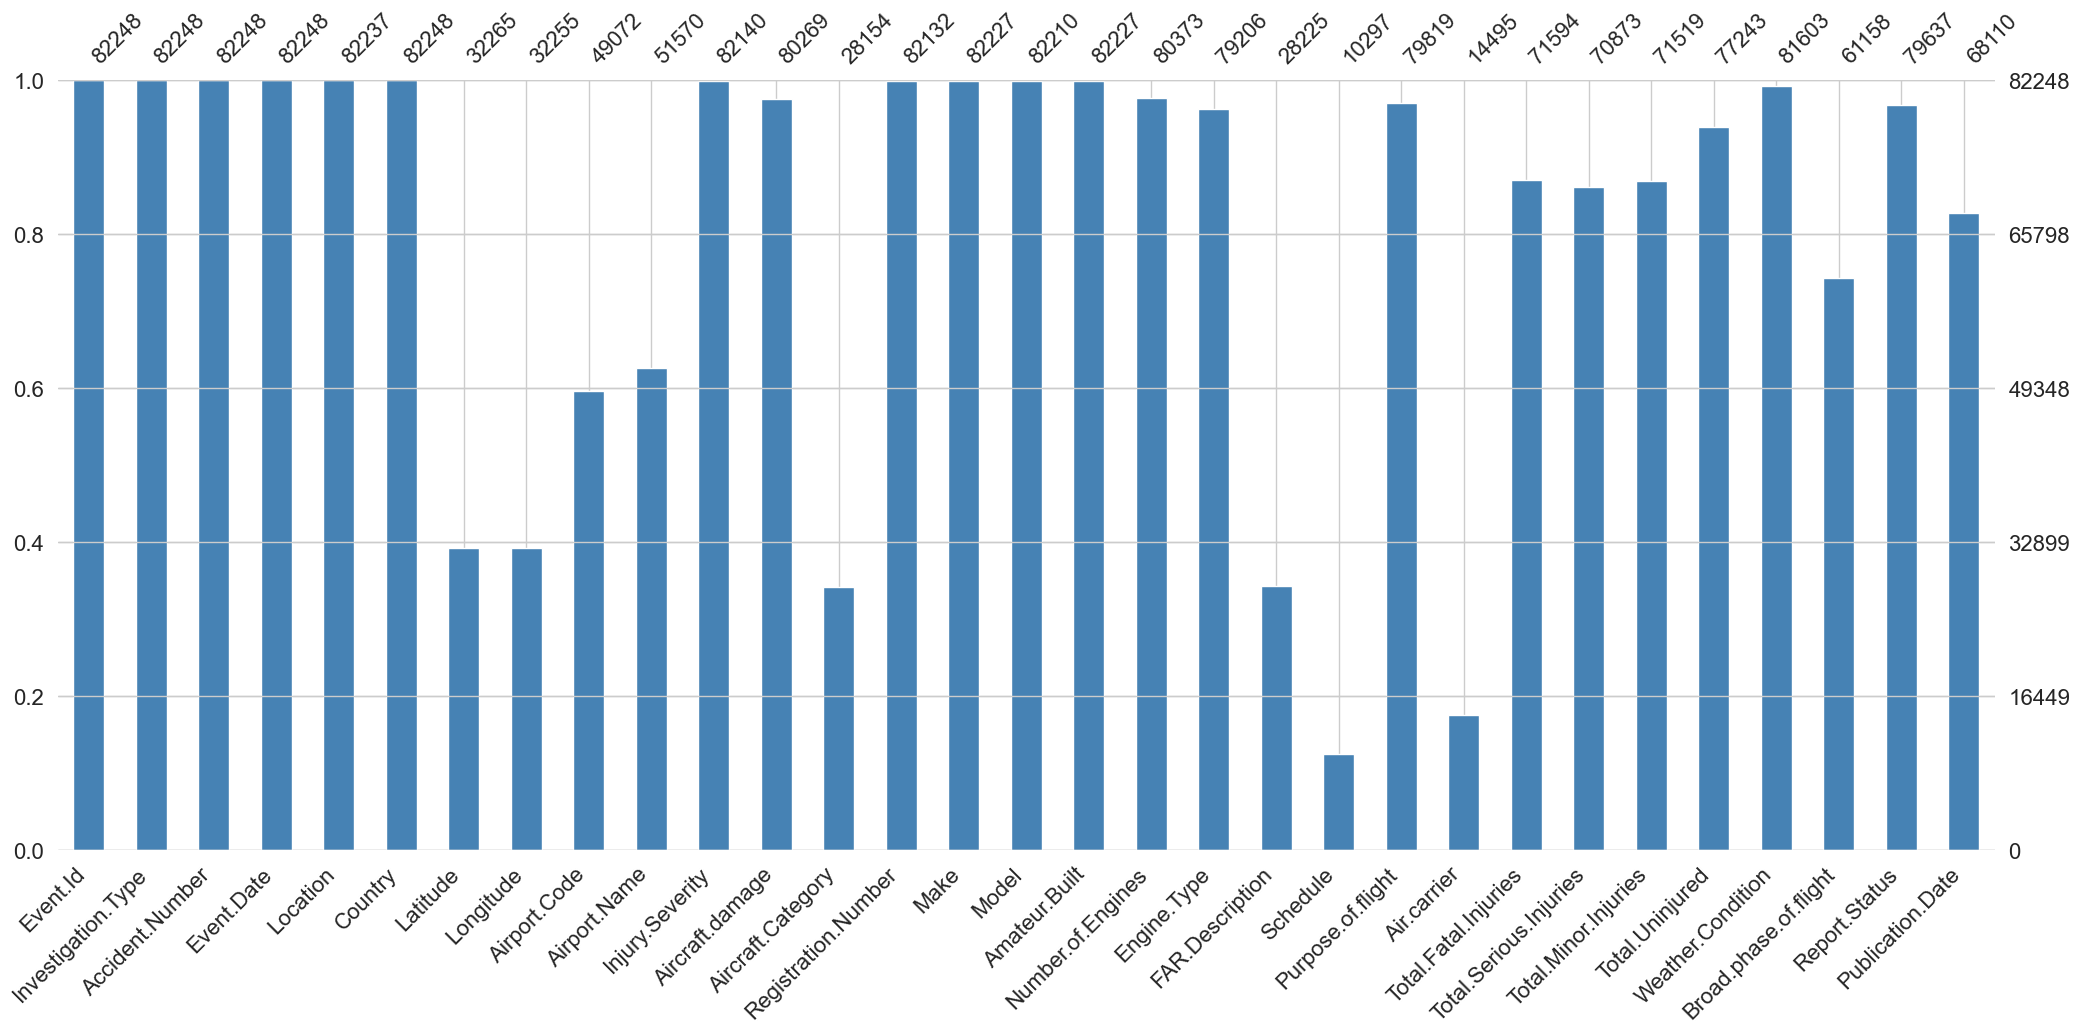

In [40]:
# Visualising missing values

msno.bar(df, color="steelblue");

We can see nearly all columns have missing data and we will remove some in the next stage or impute over the missing one.

In [7]:
# Duplicates
df["Event.Id"].duplicated().sum()

np.int64(2396)

In [8]:
df["Accident.Number"].duplicated().sum()

np.int64(1484)

In [9]:
df["Registration.Number"].duplicated().sum()

np.int64(11243)

After looking at some columns where we expected to find no duplicated such as the Event.Id or the Accident.Number we can see that some of the rows are duplicated and this could be a mistake but would be investigated later.

In addition, we can see that 11,243 aircraft registration numbers have been duplicated. This could mean they had a slight accident and could operate once again before another crash. 

In [10]:
# Number of countries
df["Country"].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

From this output we can see a glimpse of all countries/territories that have been mentioned in the dataset. We can see a mix of known locations but others which might skew the dataset if used as a whole such as 'MU' or 'BLOCK 651A'.

In [11]:
print(len(df["Country"].unique()))

220


In [13]:
# Top 10 Most populous countries and their percentages
df["Country"].value_counts(normalize=True).head(10)

Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Kingdom    0.003880
Australia         0.003384
France            0.002662
Spain             0.002549
Bahamas           0.002436
Germany           0.002425
Name: proportion, dtype: float64

From this we can see that the United States accounts for 92.7% of the dataset. This is a statistically significant sample to use. The next largest country is Brazil and that only accounts for 0.42%.

This will also make the analysis more reliable as different countries have different reporting standards and using only one country reduces the complexity and fragmentality of the  data.

In [14]:
# Dropping all countries except United States
df = df[df["Country"] == "United States"]
df["Country"].nunique()

1

In [15]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [16]:
# Checking for missing values in the United States dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     11
Country                       0
Latitude                  49983
Longitude                 49993
Airport.Code              33176
Airport.Name              30678
Injury.Severity             108
Aircraft.damage            1979
Aircraft.Category         54094
Registration.Number         116
Make                         21
Model                        38
Amateur.Built                21
Number.of.Engines          1875
Engine.Type                3042
FAR.Description           54023
Schedule                  71951
Purpose.of.flight          2429
Air.carrier               67753
Total.Fatal.Injuries      10654
Total.Serious.Injuries    11375
Total.Minor.Injuries      10729
Total.Uninjured            5005
Weather.Condition           645
Broad.phase.of.flight     21090
Report.Status              2611
Publication.Date          14138
dtype: i

**Removing irrelevant data**

In [51]:
# Overview of some columns before dropping
df[["Airport.Name","Airport.Code","FAR.Description","Schedule", "Air.carrier", 
    "Report.Status","Publication.Date"]].head(10)

,Airport.Name,Airport.Code,FAR.Description,Schedule,Air.carrier,Report.Status,Publication.Date
0,NaN,NaN,NaN,NaN,NaN,Probable Cause,NaN
1,NaN,NaN,NaN,NaN,NaN,Probable Cause,19-09-1996
2,NaN,NaN,NaN,NaN,NaN,Probable Cause,26-02-2007
3,NaN,NaN,NaN,NaN,NaN,Probable Cause,12-09-2000
4,NaN,NaN,NaN,NaN,NaN,Probable Cause,16-04-1980
5,NaN,NaN,Part 129: Foreign,SCHD,Air Canada,Probable Cause,19-09-2017
6,NaN,NaN,NaN,NaN,NaN,Probable Cause,06-11-2001
7,BLACKBURN AG STRIP,NaN,Part 91: General Aviation,NaN,NaN,Probable Cause,01-01-1982
8,HANOVER,N58,Part 91: General Aviation,NaN,NaN,Probable Cause,01-01-1982
9,JACKSONVILLE INTL,JAX,NaN,NaN,NaN,Probable Cause,01-01-1982


In [54]:
# Copy of df before dropping columns
us_df = df.copy()

# Dropping latitude and longitue
us_df.drop(columns=["Latitude", "Longitude", "Airport.Name", "Airport.Code",
                    "FAR.Description","Schedule", "Event.Id", "Country", "Air.carrier", 
                    "Publication.Date","Accident.Number", "Report.Status"], inplace=True)

# Quick overview
us_df.head()

,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


I chose to drop these columns initially as they wouldn't add any benefit in our analysis.
The rationale for this is because the 'Event.Id' would be the unique identifier and wouldn't be needed. The other columns though insightful would not add any meaningful insights to the analysis.

**Removing duplicate data**

In [ ]:
# Check for duplicates

def check_duplicates(df):
    
    duplicate_counts = {}

    for col in us_df.columns:
        duplicate_vals = us_df[col].duplicated(keep=False)
        duplicate_count = duplicate_vals.sum()
        duplicate_percentage = (duplicate_count / len(us_df)) * 100
        unique_vals = us_df[col].nunique()

        duplicate_counts[col] = {
            'Duplicates': duplicate_count,
            'Percentage': round(duplicate_percentage, 2),
            'Unique Values': unique_vals

        }

    return pd.DataFrame.from_dict(duplicate_counts, orient='index').sort_values(by='Duplicates', 
                                                                                ascending=False)

duplicates_df = check_duplicates(us_df)
print(duplicates_df)
    # print(f"Column: {col}, Duplicates: {duplicate_count}, Percentage: {duplicate_percentage:.2f}%")

                        Duplicates  Percentage  Unique Values
Investigation.Type           82248      100.00              2
Amateur.Built                82248      100.00              2
Aircraft.damage              82248      100.00              4
Broad.phase.of.flight        82248      100.00             12
Weather.Condition            82248      100.00              4
Number.of.Engines            82247      100.00              7
Purpose.of.flight            82247      100.00             26
Engine.Type                  82246      100.00             11
Aircraft.Category            82246      100.00             14
Total.Minor.Injuries         82235       99.98             45
Total.Serious.Injuries       82229       99.98             33
Total.Fatal.Injuries         82221       99.97             51
Injury.Severity              82219       99.96             56
Total.Uninjured              82172       99.91            349
Event.Date                   81215       98.74          14609
Make    

From the above data, we have most of the data that would be beneficial for our analysis

**Addressing Structural Errors**

In [56]:
# Replacing . with _
us_df.columns = us_df.columns.str.replace('.', '_')

us_df.head()

,Investigation_Type,Event_Date,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [61]:
print(us_df["Event_Date"].dtypes)

object


In [64]:
# Copy of data
us_df1 = us_df.copy()

# Converting Event_Date to datetime
us_df1["Event_Date"] = pd.to_datetime(us_df1["Event_Date"])

# Extracting year from Event_Date
us_df1["Year"] = us_df1["Event_Date"].dt.year

# Removing Event_Date column
us_df1.drop(columns=["Event_Date"], inplace=True)

us_df1.head()

,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Year
0,Accident,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,Accident,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962
2,Accident,"Saltville, VA",Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974
3,Accident,"EUREKA, CA",Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,Accident,"Canton, OH",Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979


In [ ]:
# # Extracting the number of fatalities
# us_df1["Fatalities"] = us_df1["Injury_Severity"].str.extract(r'(\d+)').astype(int)

# # Cleaning the injury severity column
# us_df1["Injury_Severity"] = us_df1["Injury_Severity"].str.extract(r'(\w+)')

# us_df1.head()

**Filtering Missing/Incorrect Data**

In [67]:
us_df1.head()

,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Year
0,Accident,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,Accident,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962
2,Accident,"Saltville, VA",Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974
3,Accident,"EUREKA, CA",Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,Accident,"Canton, OH",Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979


In [68]:
us_df1["Investigation_Type"].unique()

array(['Accident', 'Incident'], dtype=object)

In [69]:
us_df1["Injury_Severity"].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(70)',
       'Fatal(9)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(25)',
       'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)',
       'Fatal(111)', 'Fatal(20)', 'Fatal(73)', 'Fatal(34)', 'Fatal(27)',
       'Fatal(16)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)',
       'Fatal(110)', 'Fatal(230)', 'Fatal(29)', 'Fatal(228)', 'Fatal(88)',
       'Fatal(19)', 'Fatal(44)', 'Fatal(64)', 'Fatal(65)', 'Fatal(92)',
       'Fatal(265)', 'Fatal(21)', 'Fatal(49)', 'Fatal', nan, 'Minor',
       'Serious'], dtype=object)

In [76]:
severity_counts = us_df1["Injury_Severity"].value_counts()

# Count for specific severity levels
print(severity_counts.loc[["Incident","Unavailable","Serious","Minor","Non-Fatal"]].sort_values(ascending=False))



Injury_Severity
Non-Fatal      64870
Incident        1873
Minor            203
Serious          153
Unavailable       15
Name: count, dtype: int64


In [77]:
us_df1["Injury_Severity"].isna().sum()

np.int64(108)

In [85]:
us_df1.dropna(subset=["Injury_Severity"], inplace=True)
us_df1["Injury_Severity"].isna().sum()

np.int64(0)

In [97]:
us_df1.drop(us_df1[us_df1["Injury_Severity"] == "Unavailable"].index, inplace=True)

np.int64(0)

In [102]:
# Extract the number of fatalities (some rows may not have numbers, leading to NaN)
us_df1["Fatalities"] = us_df1["Injury_Severity"].str.extract(r'(\d+)')

# Convert to float first (since NaN is a float), then fill NaNs with 0, and finally convert to int
us_df1["Fatalities"] = us_df1["Fatalities"].astype(float).fillna(0).astype(int)

# Clean the Injury_Severity column by removing numbers
us_df1["Injury_Severity"] = us_df1["Injury_Severity"].str.extract(r'(\w+)')

us_df1.head()


,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Year,Fatalities
0,Accident,"MOOSE CREEK, ID",Fatal,Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948,2
1,Accident,"BRIDGEPORT, CA",Fatal,Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962,4
2,Accident,"Saltville, VA",Fatal,Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974,3
3,Accident,"EUREKA, CA",Fatal,Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977,2
4,Accident,"Canton, OH",Fatal,Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979,1
